# YouTube Sentiment Analysis - top comments

### imports

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

### Data Loading

In [3]:
df = pd.read_csv('SamsungZFlip4.csv')

In [4]:
df.head()

,Name,Comment,Time,Date
0,Mono,The flip nightmare 💀,2022-09-24T12:56:13Z,2022-09-24
1,Chyper,I would ñəʏɜr sɰɪ̈ʈɔħ ʈ̆ɤ̃ˀ̪̤̘ ʃ̪̯̈ˣʲæ̘̩̃ʷᶿ̯̪̈...,2022-09-24T11:51:39Z,2022-09-24
2,ApexIsBroken,I love buying the same phone over and over again,2022-09-24T09:58:30Z,2022-09-24
3,jitesh sawant,Looks like they are targeting womens for this ...,2022-09-24T09:48:19Z,2022-09-24
4,Denns,"Back in the day, the flip phones are analog ke...",2022-09-24T06:48:41Z,2022-09-24


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1213 non-null   object
 1   Comment  1213 non-null   object
 2   Time     1213 non-null   object
 3   Date     1213 non-null   object
dtypes: object(4)
memory usage: 38.0+ KB


# Analysis

### Data Processing: Converting the comments into usable formats

In [6]:
# dropping all columns except comment
data = df.drop(['Name', 'Time', 'Date'], axis = 1)
data.head()

,Comment
0,The flip nightmare 💀
1,I would ñəʏɜr sɰɪ̈ʈɔħ ʈ̆ɤ̃ˀ̪̤̘ ʃ̪̯̈ˣʲæ̘̩̃ʷᶿ̯̪̈...
2,I love buying the same phone over and over again
3,Looks like they are targeting womens for this ...
4,"Back in the day, the flip phones are analog ke..."


In [7]:
# view top 5 comments in plain text
print(data['Comment'].iloc[0],'\n')
print(data['Comment'].iloc[1],'\n')
print(data['Comment'].iloc[2],'\n')
print(data['Comment'].iloc[3],'\n')
print(data['Comment'].iloc[4],'\n')

The flip nightmare 💀 

I would ñəʏɜr sɰɪ̈ʈɔħ ʈ̆ɤ̃ˀ̪̤̘ ʃ̪̯̈ˣʲæ̘̩̃ʷᶿ̯̪̈ɱ̯̰̃ˠ̪̃ʂ̪̹̈ʲʅʌ̩̩ɱ̯̤̈ˠʅ̩̪̩̘̈̃ʅɯ̽ɲ̘̯̤ˠɡ)˦̆⸩])})⸩̆}⸩)̆}⸩)̆}⸩)̆ 

I love buying the same phone over and over again 

Looks like they are targeting womens for this phone. 

Back in the day, the flip phones are analog keyboards and a screen, then a touchscreen keyboard arrive, then a phablet came in. Now the phones are bigger. Next best thing will be flipped four sided phone that turns into tablet.

But I still see problems with it like what happen if it folded thousand times. Everything will get loose and become unstable. 



In [8]:
# removing stop words and punctuations
def data_process(Comment):
    Comment = Comment.lower()
    Comment = re.sub(r'\@w+|\#', '', Comment) 
    Comment = re.sub(r'[^\w\s]', '', Comment)
    word_tokens = word_tokenize(Comment)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [9]:
data['Comment'] = data['Comment'].apply(data_process)

## Data Processing: Stemming

In [10]:
stemmer = PorterStemmer()
def stemming(text):
    Comment = [stemmer.stem(word) for word in text]
    return text

In [11]:
data['Comment'] = data['Comment'].apply(lambda x: stemming(x))

In [12]:
data.head()

,Comment
0,flip nightmare
1,would ñəʏɜr sɰɪʈɔħ ʈɤˀ ʃˣʲæʷᶿɱˠʂʲʅʌɱˠʅʅɯɲˠɡ
2,love buying phone
3,looks like targeting womens phone
4,back day flip phones analog keyboards screen t...


In [13]:
# view top 5 comments in plain text
print(data['Comment'].iloc[0],'\n')
print(data['Comment'].iloc[1],'\n')
print(data['Comment'].iloc[2],'\n')
print(data['Comment'].iloc[3],'\n')
print(data['Comment'].iloc[4],'\n')

flip nightmare 

would ñəʏɜr sɰɪʈɔħ ʈɤˀ ʃˣʲæʷᶿɱˠʂʲʅʌɱˠʅʅɯɲˠɡ 

love buying phone 

looks like targeting womens phone 

back day flip phones analog keyboards screen touchscreen keyboard arrive phablet came phones bigger next best thing flipped four sided phone turns tablet still see problems like happen folded thousand times everything get loose become unstable 



## Text Polarity and Analysis

In [14]:
def polarity(Comment):
    return TextBlob(Comment).sentiment.polarity

In [15]:
data['polarity'] = data['Comment'].apply(polarity)

In [16]:
data.head()

,Comment,polarity
0,flip nightmare,0.000000
1,would ñəʏɜr sɰɪʈɔħ ʈɤˀ ʃˣʲæʷᶿɱˠʂʲʅʌɱˠʅʅɯɲˠɡ,0.000000
2,love buying phone,0.500000
3,looks like targeting womens phone,0.000000
4,back day flip phones analog keyboards screen t...,0.184615


In [17]:
def sentiment(label):
    if label < 0:
        return 'Negative'
    elif label == 0:
        return 'Neutral'
    elif label > 0:
        return 'Positive'

In [18]:
data['sentiment'] = data['polarity'].apply(sentiment)

In [19]:
data.head()

,Comment,polarity,sentiment
0,flip nightmare,0.000000,Neutral
1,would ñəʏɜr sɰɪʈɔħ ʈɤˀ ʃˣʲæʷᶿɱˠʂʲʅʌɱˠʅʅɯɲˠɡ,0.000000,Neutral
2,love buying phone,0.500000,Positive
3,looks like targeting womens phone,0.000000,Neutral
4,back day flip phones analog keyboards screen t...,0.184615,Positive


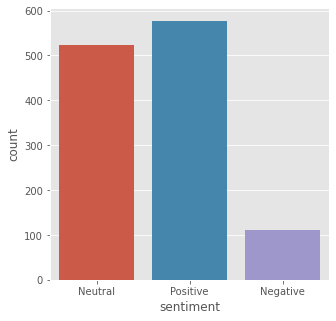

In [45]:
fig = plt.figure(figsize = (5,5))
sns.countplot(x = 'sentiment', data = data)
plt.savefig('bar.png')
plt.show() # gives an indication of different sentiments in the data

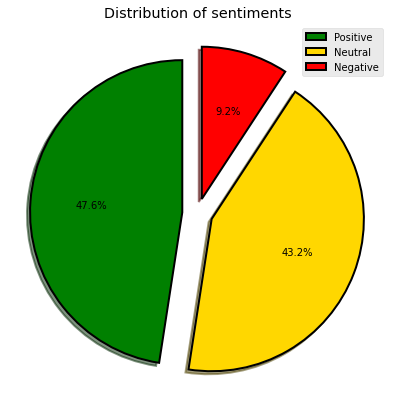

In [41]:
fig = plt.figure(figsize = (7,7))
colors = ('green', 'gold', 'red')
labels = ('Positive', 'Neutral', 'Negative')
wp = {'linewidth':2, 'edgecolor':'black'}
tags = data['sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, colors = colors,
         startangle = 90, wedgeprops = wp, explode = explode, label = '', labels = None, legend = True)
plt.title('Distribution of sentiments')
plt.savefig('pie.png')
plt.show()

In [43]:
# top positive comments
pos_coms = data['sentiment'] == 'Positive'
pos_coms = data.sort_values(by = 'polarity', ascending = False)
pos_coms.head()

,Comment,polarity,sentiment
753,superb ad marketing,1.0,Positive
141,perfect,1.0,Positive
397,best ad ever film,1.0,Positive
1130,best timinghahahahaha,1.0,Positive
1063,wonderful video,1.0,Positive


In [23]:
import os
from PIL import Image
os.chdir(r'C:\python image')

In [24]:
mask = np.array(Image.open('youtube-logo.png'))

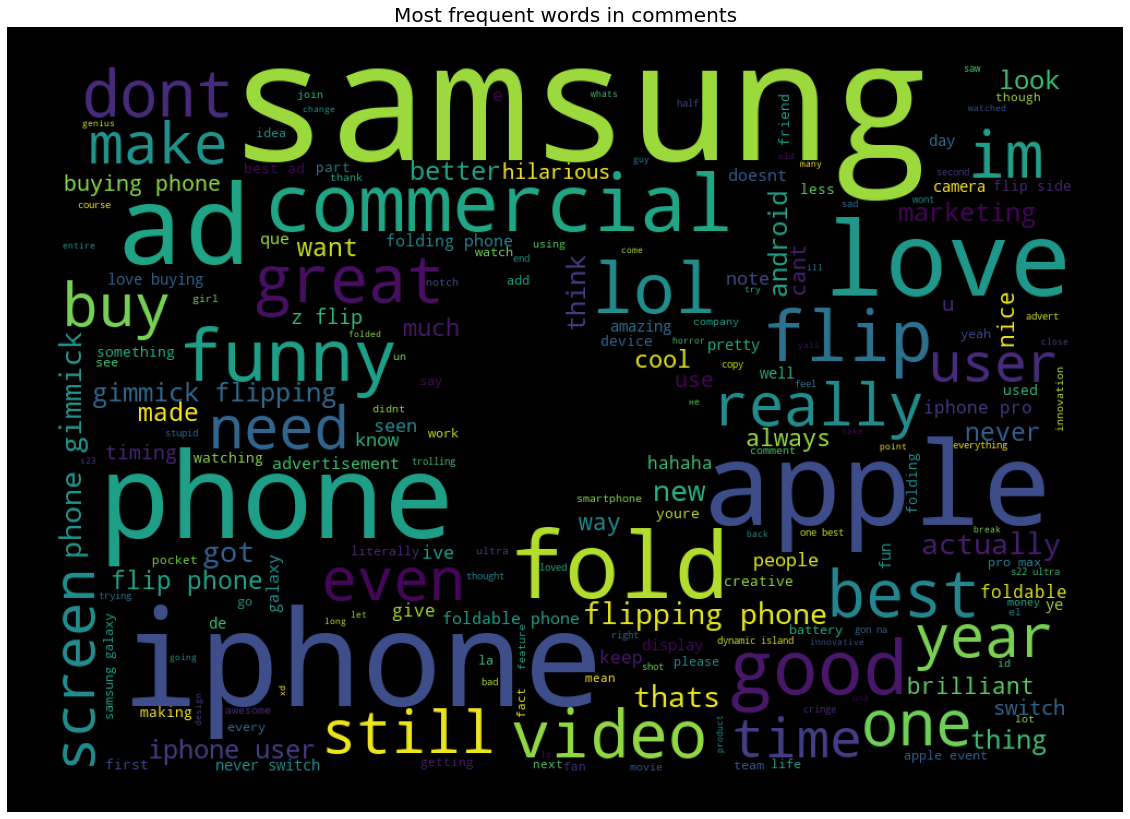

In [25]:
# visualizing all frequent comments on word cloud
text = ' '.join([word for word in data['Comment']])
cloud = WordCloud(background_color = 'black', mask = mask)
cloud.generate(text)
plt.figure(figsize = (20,15), facecolor = 'none')
plt.imshow(cloud)
plt.axis('off')
plt.title('Most frequent words in comments', fontsize = 20)
plt.show()

In [26]:
# wordcloud.to_file('wordcloud.png')
cloud.to_file('word.png')